In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [70]:
df = pd.read_csv('myFilmdata.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9164 entries, 0 to 9163
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9164 non-null   int64  
 1   title                 9164 non-null   object 
 2   genres                9164 non-null   object 
 3   original_language     9164 non-null   object 
 4   overview              9144 non-null   object 
 5   popularity            9164 non-null   float64
 6   production_companies  9164 non-null   object 
 7   release_date          9164 non-null   object 
 8   budget                9164 non-null   float64
 9   revenue               9164 non-null   float64
 10  runtime               9164 non-null   float64
 11  status                9164 non-null   object 
 12  vote_average          9164 non-null   float64
 13  vote_count            9164 non-null   float64
 14  credits               9164 non-null   object 
dtypes: float64(6), int64(

In [72]:
x=df
x

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits
0,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,4378.531,Marvel Studios,2022-11-09,250000000.0,8.550990e+08,162.0,Released,7.449,3340.0,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...
1,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family-Fantasy,en,Puss in Boots discovers that his passion for a...,3204.321,Universal Pictures-DreamWorks Animation,2022-12-07,90000000.0,4.230000e+08,103.0,Released,8.485,3884.0,Antonio Banderas-Salma Hayek-Harvey Guillén-Wa...
2,646389,Plane,Action-Adventure-Thriller,en,After a heroic job of successfully landing his...,3115.286,Di Bonaventura Pictures-MadRiver Pictures-Rive...,2023-01-13,25000000.0,4.600000e+07,107.0,Released,6.800,502.0,Gerard Butler-Mike Colter-Yoson An-Tony Goldwy...
3,536554,M3GAN,Science Fiction-Horror-Comedy,en,A brilliant toy company roboticist uses artifi...,2088.921,Universal Pictures-Blumhouse Productions-Atomi...,2022-12-28,12000000.0,1.676440e+08,102.0,Released,7.535,1662.0,Allison Williams-Violet McGraw-Jenna Davis-Ami...
4,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,1738.087,Lightstorm Entertainment-20th Century Studios,2022-12-14,460000000.0,2.243276e+09,192.0,Released,7.733,5343.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,823471,Beached,Drama,en,BEACHED tells the surreal story of two days in...,0.600,Impasse Pictures,2009-06-05,41703.0,4.170300e+04,15.0,Released,10.000,1.0,Alex Warner-Nina Jamil-Mark Cainen-Ray Gravell
9160,817989,The Vigil,Drama-Thriller,es,The Vigil is a thriller film that tells the st...,0.600,Argos Producciones,2010-10-28,262.0,2.900000e+01,90.0,Released,4.000,1.0,Gianfranco Brero-Stephanie Orúe
9161,838099,The Plague,Action-Crime,es,A funny teenager is bullied by a pair of basta...,0.600,AmorArtis,2019-06-13,5.0,1.000000e+00,12.0,Released,7.000,1.0,Andreo Chimal-Otoniel Noris-Emmanuel López-Cés...
9162,854916,Rejects,Action-Drama-Science Fiction,en,Guns cash and four friends who have the wrong ...,0.600,Lab5 Films,2021-07-30,500.0,5.000000e+02,13.0,Released,8.000,1.0,Honda King-Randall Walter McDonald-Austin Buch...


0        250000000.0
1         90000000.0
2         25000000.0
3         12000000.0
4        460000000.0
            ...     
11065       500000.0
11066          500.0
11067            1.0
11068           10.0
11069           10.0
Name: budget, Length: 11070, dtype: float64

In [73]:
x.loc[:, 'budget']= x['budget'] / 1000000

In [74]:
x.loc[:, 'revenue'] = x['revenue'] / 1000000

In [75]:
x = x.sort_values(by='budget')
x['budget']

9163      0.000001
9142      0.000001
9141      0.000001
8075      0.000001
8993      0.000001
           ...    
7657    300.000000
99      356.000000
154     365.000000
114     380.000000
4       460.000000
Name: budget, Length: 9164, dtype: float64

In [76]:
x = x.sort_values(by='revenue')
x['revenue']

9163       0.000001
9121       0.000001
9123       0.000001
8033       0.000001
8844       0.000001
           ...     
471     2068.223624
25      2187.463944
4       2243.275991
99      2797.800564
6       2920.357254
Name: revenue, Length: 9164, dtype: float64

In [77]:
x = x.drop(x[x['budget'] < 5].index)
x = x.drop(x[x['revenue'] < 5].index)

In [78]:
x['budget'].value_counts()
x['revenue'].value_counts()


20.000000     238
25.000000     217
30.000000     201
15.000000     200
10.000000     175
             ... 
63.600000       1
5.700000        1
18.052672       1
17.516235       1
237.000000      1
Name: budget, Length: 485, dtype: int64

12.000000      12
20.000000       9
30.000000       8
16.000000       8
15.000000       7
               ..
29.612137       1
29.610210       1
29.541790       1
29.523237       1
2920.357254     1
Name: revenue, Length: 4881, dtype: int64

In [224]:
x2=np.log(x['budget'])
y2=np.log(x['revenue'])
df1 = pd.DataFrame({'budget_log': x2, 'revenue_log': y2})

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='budget_log', ylabel='revenue_log'>

Text(0.5, 1.0, 'Budget vs Revenue')

Text(0.5, 0, 'Budget ')

Text(0, 0.5, 'Revenue')

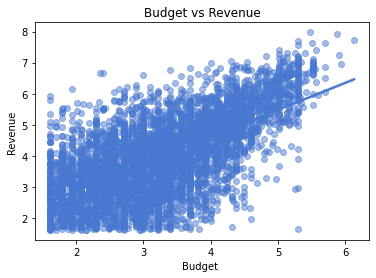

In [225]:
sns.regplot(x = 'budget_log', y = 'revenue_log', data = df1, scatter_kws={'alpha':0.5})
plt.title('Budget vs Revenue')          # Set title.
plt.xlabel("Budget ")       # Set x-axis label.
plt.ylabel('Revenue')    # Set y-axis label.

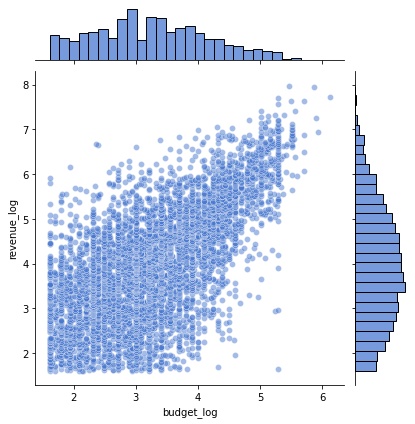

In [82]:
sns.jointplot(x = 'budget_log', y = 'revenue_log', data = df1,alpha = 0.5)

In [253]:
x.to_csv('MyDataFilmsScaled.csv', index=False)

In [ ]:
X = x[['vote_average','budget', 'runtime']]
y = x['revenue']

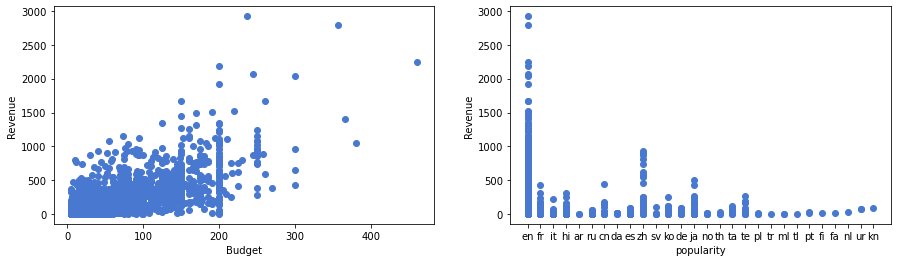

In [131]:
plt.figure(figsize = (15,4))
plt.subplot(121)
plt.scatter(X.budget,y)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.subplot(122)
plt.scatter(X.original_language,y)
plt.xlabel("popularity")
plt.ylabel("Revenue");

In [226]:
def is_english(lang):
    if lang == 'en':
        return 1
    else:
        return 0

In [227]:
x['language'] = x['original_language'].apply(is_english)

In [228]:
x

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,vote_average,vote_count,credits,language
5277,15660,Mommie Dearest,Drama,en,Renowned actress Joan Crawford at the height o...,10.589,Paramount-The Irwin Yablans Company,1981-09-18,19.032261,5.000000,128.0,Released,6.400,166.0,Faye Dunaway-Diana Scarwid-Steve Forrest-Howar...,1
6131,230266,Miss Julie,Drama,en,Over the course of a midsummer night in Ferman...,8.633,Maipo Film-The Apocalypse Films,2014-09-07,5.500000,5.000000,130.0,Released,5.700,123.0,Jessica Chastain-Colin Farrell-Samantha Morton...,1
2546,9322,La Femme Nikita,Action-Thriller,fr,A beautiful felon sentenced to life in prison ...,19.647,Gaumont-Cecchi Gori Group Tiger Cinematografic...,1990-02-21,8.538703,5.000000,117.0,Released,7.100,1636.0,Anne Parillaud-Jean-Hugues Anglade-Tchéky Kary...,0
6349,592336,Don't Stop Me Now,Comedy,it,Paola a modern woman used to the hardships of ...,8.115,Wildside-Vision Distribution,2019-04-18,8.000000,5.000000,102.0,Released,6.346,331.0,Paola Cortellesi-Stefano Fresi-Vinicio Marchio...,0
6677,8747,The Black Balloon,Drama,en,Thomas is turning 16. His dad's in the army an...,7.272,Black Balloon Productions,2008-03-08,5.000000,5.000000,97.0,Released,6.800,65.0,Toni Collette-Rhys Wakefield-Luke Ford-Gemma W...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,140607,Star Wars: The Force Awakens,Adventure-Action-Science Fiction-Fantasy,en,Thirty years after defeating the Galactic Empi...,57.305,Lucasfilm-Bad Robot,2015-12-15,245.000000,2068.223624,136.0,Released,7.305,17755.0,Harrison Ford-Mark Hamill-Carrie Fisher-Adam D...,1
25,597,Titanic,Drama-Romance,en,101-year-old Rose DeWitt Bukater tells the sto...,319.114,Paramount-20th Century Fox-Lightstorm Entertai...,1997-11-18,200.000000,2187.463944,194.0,Released,7.888,22350.0,Leonardo DiCaprio-Kate Winslet-Billy Zane-Kath...,1
4,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,1738.087,Lightstorm Entertainment-20th Century Studios,2022-12-14,460.000000,2243.275991,192.0,Released,7.733,5343.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-B...,1
99,299534,Avengers: Endgame,Adventure-Science Fiction-Action,en,After the devastating events of Avengers: Infi...,128.607,Marvel Studios,2019-04-24,356.000000,2797.800564,181.0,Released,8.270,22651.0,Robert Downey Jr.-Chris Evans-Mark Ruffalo-Chr...,1


 ## Linear regresion 1.0

In [284]:
X = x[['vote_average','budget']]
y = x['revenue']


In [286]:
model = LinearRegression()
model

LinearRegression()

In [287]:
model.fit(X,y)

LinearRegression()

In [288]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [289]:
model.intercept_
model.coef_

-328.3503375645852

array([49.34393502,  3.15140856])

In [290]:
# prediction on X (fitted values)
y_pred = model.predict(X)
y_pred

array([  47.42927676,  -29.75716089,   48.90054277, ..., 1502.87424902,
       1201.625452  ,  791.86970324])

In [291]:
mean_squared_error(y, y_pred)
r2_score(y, y_pred)

17676.850246518887

0.5526229061323582

In [292]:
y_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_test_pred)
r2_score(y_test, y_test_pred)

236192.63421781655

-4.035295288755512

## Linear regression 2.0-scalled

In [293]:
X = x[['budget', 'vote_average']]
y = x['revenue']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [295]:
scaler = StandardScaler()

In [296]:
scaler.fit(X_train)

StandardScaler()

In [297]:
X_train = scaler.transform(X_train)

In [298]:
X_test = scaler.transform(X_test)

In [299]:
model = LinearRegression()

In [300]:
model.fit(X_train, y_train)

LinearRegression()

In [301]:
y_train_pred = model.predict(X_train)
mean_squared_error(y_train, y_train_pred)
r2_score(y_train, y_train_pred)

15453.316495236795

0.5747340680188171

In [302]:
y_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_test_pred)
r2_score(y_test, y_test_pred)

22898.50574075904

0.5118360127621302

In [303]:
model.intercept_
model.coef_

118.23593609299078

array([136.91693301,  37.34948367])

In [252]:
df = pd.read_csv('MyDataFilmsScaled.csv')
df.head()
# split the actors column by '-'
actors = df['credits'].str.split('-', expand=True)

# Create a new dataframe with the revenue column and actor columns
new_df = pd.concat([df["revenue"], actors], axis=1)

# Iterate over each actor column and create a new column with 1s and 0s based on if the actor is in the column
for actor_col in actors.columns:
    new_df[actor_col] = new_df.apply(lambda row: int(actor_col in row.values), axis=1)

    # Create X and y matrices for linear regression
X = new_df.drop(columns=["revenue"])
y = new_df["revenue"]

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients for each actor
actor_coefficients = list(zip(X.columns, model.coef_))

# Sort actor coefficients by value and get top 50 actors with largest coefficients
top_actors = sorted(actor_coefficients, key=lambda x: abs(x[1]), reverse=True)[:50]

# Print top 50 actors with largest coefficients
print("Top 50 actors with largest coefficients:")
for actor, coefficient in top_actors:
    print(actor, coefficient)

I want it to print me name of the actors instead of the numerical values that I got following this code